In [1]:

import os, sys
sys.path.append(os.path.dirname(os.path.abspath("covidviz")) + (os.path.sep + '..'))
import covidviz as cvz
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import folium


In [11]:
url_dep = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
url_reg = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
departments = gpd.read_file(url_dep)
regions = gpd.read_file(url_reg)


# import covid data 
df_covid_raw = cvz.Load_db().save_as_df()
df_covid_raw["date"] = df_covid_raw.date.astype(str) + ' 00:00'


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
0,2020-01-01 00:00,pays,FRA,France,NaN,NaN,NaN,NaN,44985.0,19780.0,NaN,24296.0,NaN,NaN,194901.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
1,2020-01-07 00:00,pays,FRA,France,2727321.0,NaN,149671.0,NaN,46539.0,20302.0,2582.0,24521.0,1438.0,180.0,200079.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
2,2020-01-08 00:00,pays,FRA,France,NaN,NaN,NaN,NaN,46815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
3,2020-01-16 00:00,pays,FRA,France,2894347.0,NaN,159791.0,NaN,48783.0,21359.0,2741.0,25019.0,1197.0,188.0,209056.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
4,2020-01-17 00:00,pays,FRA,France,2910989.0,NaN,159791.0,NaN,48924.0,21359.0,2776.0,25269.0,697.0,136.0,209343.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50889,2021-04-16 00:00,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,3343.0,NaN,259.0,1318.0,94.0,21.0,14066.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
50890,2021-04-16 00:00,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,3920.0,NaN,405.0,1855.0,118.0,33.0,17776.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
50891,2021-04-16 00:00,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,10497.0,NaN,688.0,3772.0,263.0,55.0,44021.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
50892,2021-04-16 00:00,region,REG-93,Provence-Alpes-Côte d'Azur,NaN,NaN,NaN,NaN,7130.0,NaN,586.0,3246.0,225.0,56.0,34395.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [14]:
# columns we want to keep 
columns = ['date', 'granularite', 'maille_code', 'maille_nom','cas_confirmes', 'hospitalises','deces']
df_covid_cleaned = cvz.choose_columns(df_covid_raw, columns)

# keep only departements
df_covid_cleaned_dep = cvz.choose_granularity(df_covid_cleaned,"departement")

# format departements
df_covid = cvz.format_granularity(df_covid_cleaned_dep, "departement")


# keep only regions
df_covid_cleaned_reg = cvz.choose_granularity(df_covid_cleaned,"region")

# format regions
df_covid_reg = cvz.format_granularity(df_covid_cleaned_reg, "region")

In [15]:
# Plot map with covid deads by department
map = cvz.Map_covid(df_covid, departments, "deces")
map.plot_all()


Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

In [17]:
# Plot map with covid hospitalized by department
map = cvz.Map_covid(df_covid, departments, "hospitalises")
map.plot_all()

Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

NoneType

In [5]:
# Plot map with covid death by region
map = cvz.Map_covid(df_covid_reg, regions, "deces")
map.plot_all()


Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

In [18]:
# Plot map with covid hospitalized by region
map = cvz.Map_covid(df_covid_reg, regions, "hospitalises")
map.plot_all()


Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

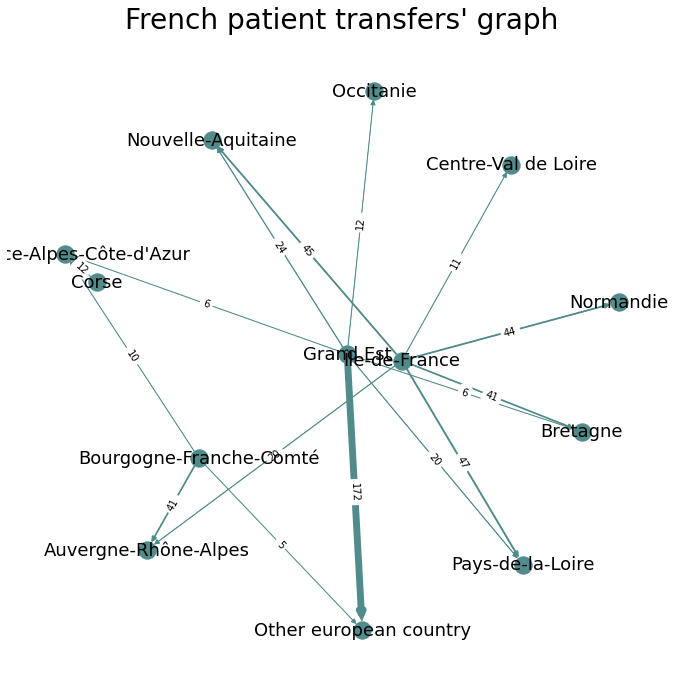

<Figure size 864x864 with 0 Axes>

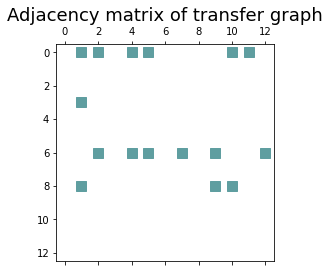

In [19]:
G = cvz.create_transfer_graph()
cvz.plot_transfer_graph(G)

A = cvz.plot_adjacency_matrix(G)

In [20]:
import pydeck as pdk 


In [21]:
map.to_json("bla.json")

AttributeError: 'Map_covid' object has no attribute 'to_json'

# Screening data treatment


## The map of France with all the covid screening centers

From https://www.data.gouv.fr/fr/datasets/sites-de-prelevements-pour-les-tests-covid/, we import data from collection sites for COVID tests. These data include basic information such as address, telephone number, hours, website, collection methods (with / without appointment, on site / drive). The type of screening performed (PCR, antigen) is also indicated. There are two types of covid testing centers, depending on the audience accepted. In general, these are all public sites (they will be indicated by green markers on the map), but there are also restricted access sampling sites (they will be indicated by red markers on the map). These screening centers rather accept nursing staff, hospitalized patients, fragile patients, etc.

There are also the coordinates of each sampling site, which will allow us to place them on the map. We also import a table with the coordinates of each department in France. Having a lot of screening locations, the map of France would become illegible. We then opted to display the maps of the French departments.

In [2]:
# all informations about screening centers in public access in France

grand_public_path = '../covidviz/data/scr_public_centers.csv'
depis_grand_public = pd.read_csv(grand_public_path)

# all informtations about screening centers in restricted access in France

acces_restreint_path = '../covidviz/data/scr_private_centers.csv'
depis_acces_restreint = pd.read_csv(acces_restreint_path)

# coordinates of french departments

dep_fr = pd.read_csv('../covidviz/data/depart_fr_coord.csv', delimiter=';')

We cleaned and also checked that each center had its geographic coordinates. There were 5 missing for the public centers, we found them thanks to the address. After that, we gathered in a dictionary all the maps of departments, to then add the markers (green and red) by department. Here we display the map of the Hérault department (34).

In [8]:
cvz.map_screening('34', dep_fr, depis_grand_public, depis_acces_restreint)

## Visualization of the evolution of screening in France according to age group and / or department

From https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/, we import data on the number of screened per day (since May 13, 2020) according to the age group, but also the department. It is also indicated the number of positive tests.

In [2]:
screening_daily = pd.read_csv(
    '../covidviz/data/sp-pos-quot-dep-2021-04-16-19h05.csv',
    delimiter=';',
    low_memory=False)

This shows the number of daily screening among 30-39 year olds in the Hérault department (34). The color indicates the percentage of positive tests: the more the color intensifies towards yellow, the higher the percentage.

In [6]:
cvz.daily_test(39, '34', screening_daily)

/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

This shows the number of daily screening in the Hérault department (34). The color indicates the percentage of positive tests: the more the color intensifies towards yellow, the higher the percentage.

In [7]:
cvz.daily_test_dep('34', screening_daily)

/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This shows the number of daily screening among 30-39 year olds in France. The color indicates the percentage of positive tests: the more the color intensifies towards yellow, the higher the percentage.

In [10]:
cvz.daily_test_age(39, screening_daily)

/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/stef/opt/anaconda3/envs/stef_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/stef/opt/